
# Topic- Classification problem on Machine Learnig 

## The goal of this project is to give Machine Learning Pipline to a given dataset called Heart Disease Dataset and see which Classification algorithm performs well

# Dataset Description
## Variable - Each attribute is a potential risk factor. There are both demographic, behavioural & medical risk factors
### 1. Demographic: sex: male and age: age of the patient;
### 2. Behavioural: currentSmoker(whether or not the patient is a current smoker or not) and cigsPerDay(no of cigarettes that the person somked on average)  
### 3. Medical[history]: BPMeds(whether or not the patient was on blood pressure medication) and prevalentStroke(whether or not the patient had previously a stroke) and diabetes(whether or not the patient had diabetes)
### 4. Medical[current]: totCol(total cholesterol level) and sysBP(systotic blood pressure) and diaBP(diastolic blood pressure) and BMI(Body Mass Index) and heartRate and glucose
### 5. Predict variable[desired target]: 10 year risk of coronary heart disease CHD (in binary 0 or 1)

### Load the required Libraries with the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Check the missing values

In [5]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.mean()

male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [7]:
df=df.fillna(df.mean())

In [8]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Visualizing the data

<Figure size 1440x432 with 0 Axes>

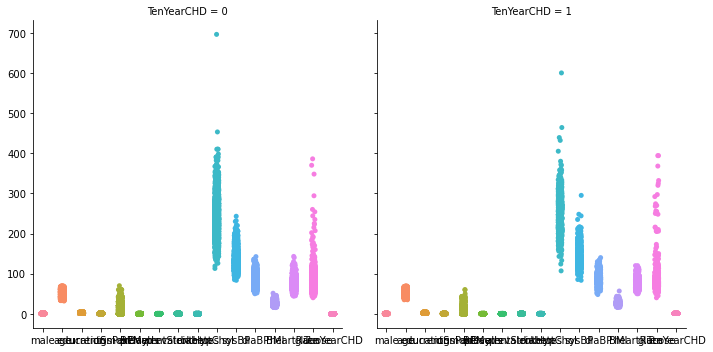

In [9]:
fig=plt.figure(figsize=(20,6))
fig
sns.catplot(data=df,col='TenYearCHD')

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

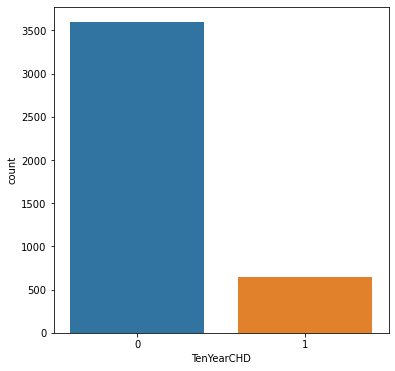

In [10]:
fig=plt.figure(figsize=(6,6))
fig
sns.countplot(data=df,x='TenYearCHD')

In [11]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.038146,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


<AxesSubplot:>

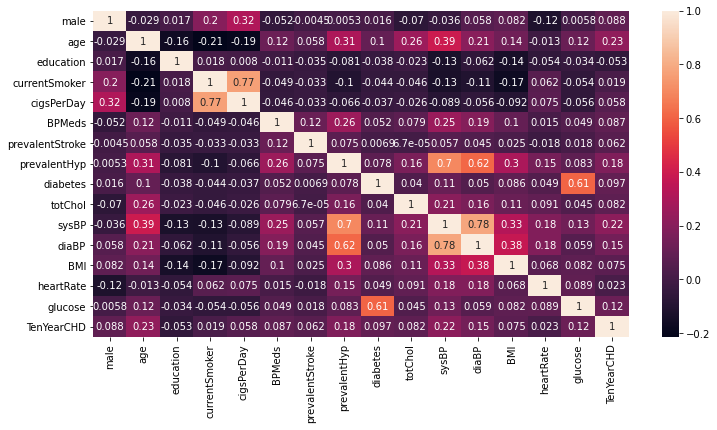

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<AxesSubplot:xlabel='heartRate', ylabel='BMI'>

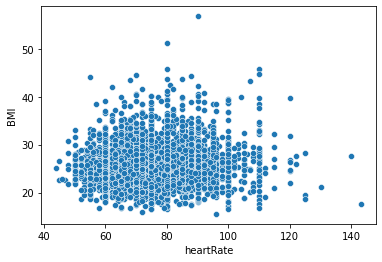

In [14]:
sns.scatterplot(data=df,x='heartRate',y='BMI')

<AxesSubplot:xlabel='heartRate', ylabel='BMI'>

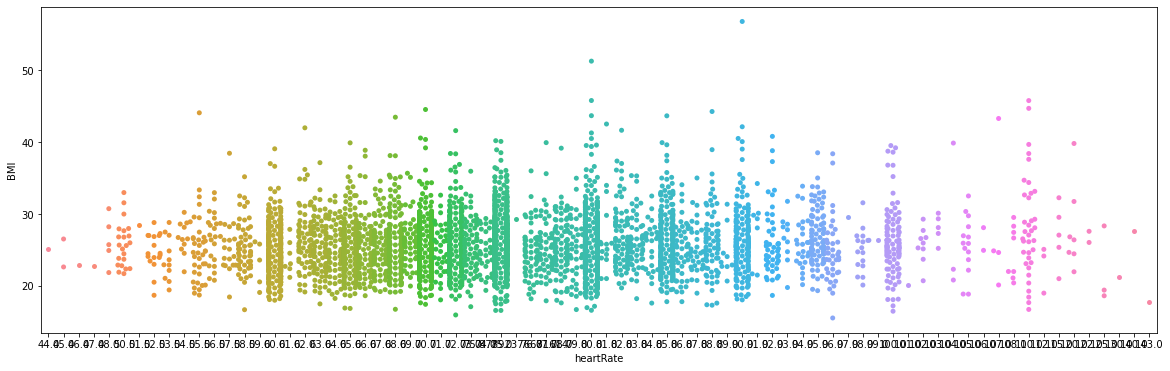

In [15]:
plt.figure(figsize=(20,6))
sns.swarmplot(data=df,x='heartRate',y='BMI')

<Figure size 1080x360 with 0 Axes>

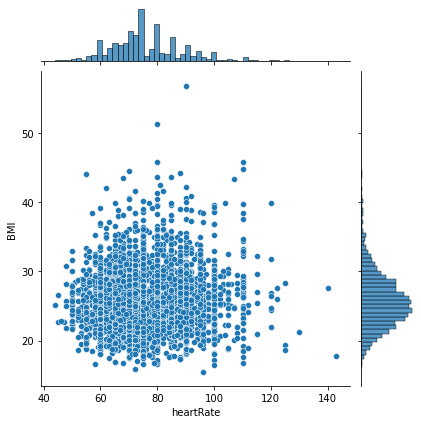

In [16]:
plt.figure(figsize=(15,5))
sns.jointplot(data=df,x='heartRate',y='BMI')

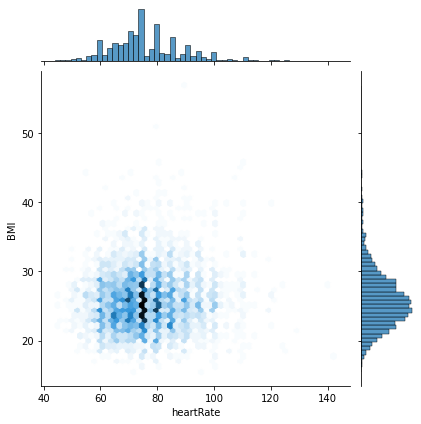

In [17]:
sns.jointplot(data=df,x='heartRate',y='BMI',kind='hex')

<AxesSubplot:>

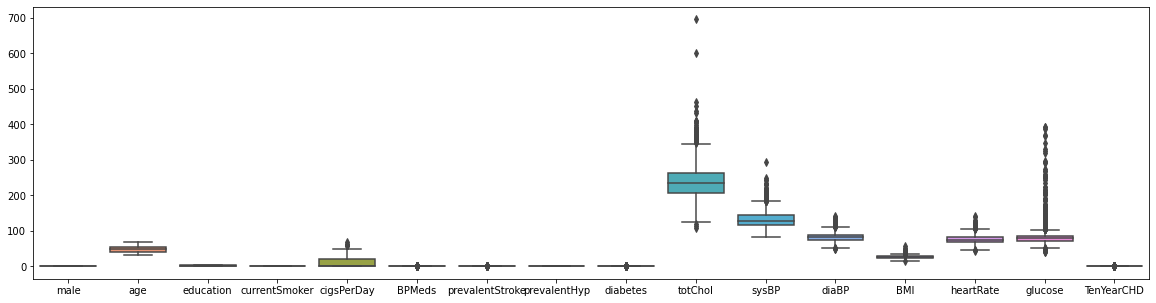

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df)

<AxesSubplot:xlabel='BMI'>

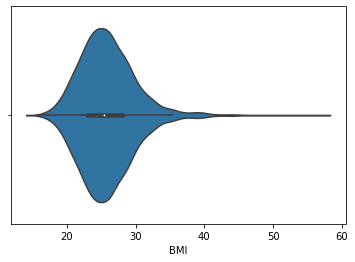

In [19]:
sns.violinplot(data=df,x='BMI')

<AxesSubplot:xlabel='heartRate'>

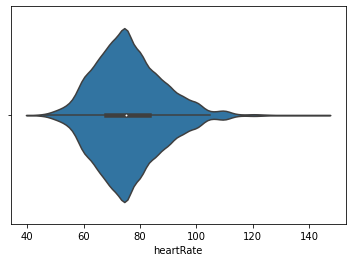

In [20]:
sns.violinplot(data=df,x='heartRate')

<AxesSubplot:xlabel='glucose'>

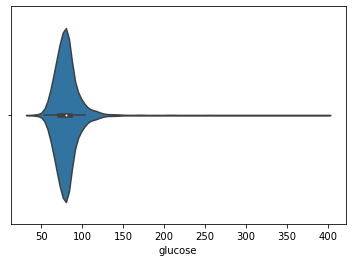

In [21]:
sns.violinplot(data=df,x='glucose')

<AxesSubplot:xlabel='currentSmoker'>

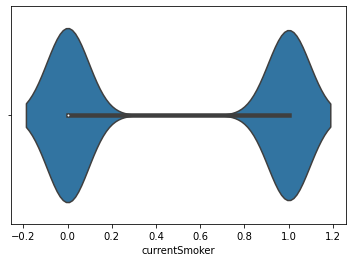

In [22]:
sns.violinplot(data=df,x='currentSmoker')

In [23]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [24]:
count=pd.value_counts(df['TenYearCHD'])
count

0    3594
1     644
Name: TenYearCHD, dtype: int64

### our target data is unbalanced so lets do the balance

In [25]:
!pip install install imbalanced--learn

In [26]:
# make strategy first
#from  imblearn.over_sampling import RandomOverSampler
#oversample=RandomOverSampler(sampling_strategy=0.5)
#ros=RandomOverSampler()
#x,y=ros.fit_sample(x,y)

### Train, Test

In [27]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=('TenYearCHD'))
y=df['TenYearCHD']

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
sm=SMOTE(random_state=0)

In [30]:
x_sm,y_sm=sm.fit_resample(x,y)

In [31]:
print('before smote x is:',x.shape,'after smoting x_sm:',x_sm.shape)

before smote x is: (4238, 15) after smoting x_sm: (7188, 15)


In [32]:
print('before smote y is:',y.shape,'after smote y is:',y_sm.shape)

before smote y is: (4238,) after smote y is: (7188,)


In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.2)

### import important libraries

In [34]:
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
# logistiC Regression 
LogisticRegressionPipeline=Pipeline([('myscaler', MinMaxScaler()),('logistic_classifier',LogisticRegression())])

In [36]:
#Decision Tree 
DecisionTreePipeline=Pipeline([('myscaler',MinMaxScaler()),('decisionTree_classifier',DecisionTreeClassifier())])

In [37]:
#RandomForest
RandomForestPipeline=Pipeline([('myscaler', MinMaxScaler()),('randomforest_classifier',RandomForestClassifier())])

In [38]:
#Naive Bayes 
GaussianNBPipeline=Pipeline([('myscaler', MinMaxScaler()),('Naive_Bayes', GaussianNB())])

In [39]:
#k nearest neighbors
kNearestNeighborsPipeline=Pipeline([('myscaler', MinMaxScaler()),('KNearest_Neighbors', KNeighborsClassifier())])

In [40]:
#Xg boost Bayes 
XGBoostPipeline=Pipeline([('myscaler', MinMaxScaler()),('XGBoost', XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1))])

In [41]:
#defining pipline in a list 
mypipeline = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline, GaussianNBPipeline,kNearestNeighborsPipeline,XGBoostPipeline]

In [42]:
#defining variables to choose the best model
accuracy=0.0
classifier=0
pipeline=""

In [43]:
PipelineDict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Naive Bayes', 4: 'K Nearest Neighbors',5:'XG Boost'}

In [44]:
#fitting 
for mypipe in mypipeline:
    mypipe.fit(xtrain, ytrain)

[20:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
#accuracy for all the models is:-
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(xtest,ytest)))

Logistic Regression Test Accuracy: 0.6821974965229486
Decision Tree Test Accuracy: 0.8198887343532685
Random Forest Test Accuracy: 0.9033379694019471
Naive Bayes Test Accuracy: 0.614047287899861
K Nearest Neighbors Test Accuracy: 0.760778859527121
XG Boost Test Accuracy: 0.8616133518776078


In [46]:
Accuracy=[]

for i,model in enumerate(mypipeline):
    acc=model.score(xtest,ytest)
    Accuracy.append(acc)
Accuracy

[0.6821974965229486,
 0.8198887343532685,
 0.9033379694019471,
 0.614047287899861,
 0.760778859527121,
 0.8616133518776078]

<BarContainer object of 6 artists>

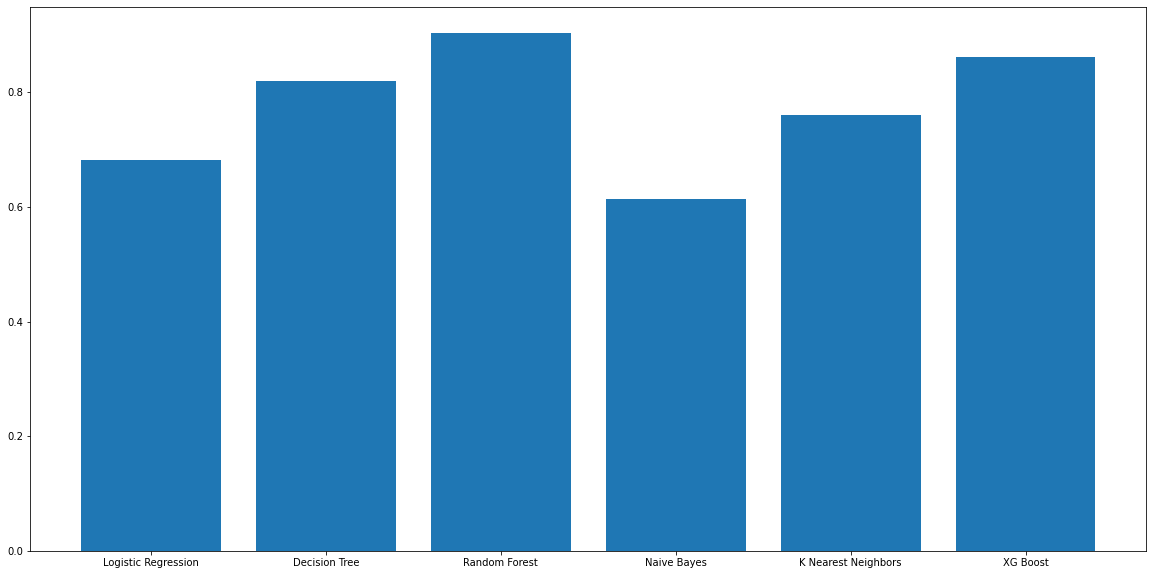

In [47]:
plt.figure(figsize=(20,10))
plt.bar(PipelineDict.values(),Accuracy)

In [48]:
# The best accuracy of all is:-
for i,model in enumerate(mypipeline):
    if Accuracy[i]>0.90:
        accuracy=model.score(xtest,ytest)
        pipeline=model
        classifier=i
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

Classifier with best accuracy:Random Forest


In [49]:
#predicted value of y
ypred=model.predict(xtest)
ypred


array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [50]:
prediction=pd.DataFrame({'actual':ytest,'prediction':ypred})
prediction

,actual,prediction
5738,1,1
2919,0,0
3820,0,0
1998,0,0
4513,1,1
...,...,...
4337,1,1
2434,0,0
3809,1,0
7087,1,1


In [51]:
#accuracy
ac=accuracy_score(ytest,ypred)
ac

0.8616133518776078

In [52]:
#confusion matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[664,  41],
       [158, 575]], dtype=int64)

In [53]:
#classification report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       705
           1       0.93      0.78      0.85       733

    accuracy                           0.86      1438
   macro avg       0.87      0.86      0.86      1438
weighted avg       0.87      0.86      0.86      1438



<AxesSubplot:>

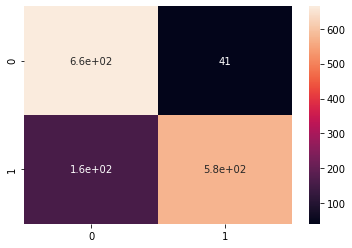

In [54]:
sns.heatmap(cm,annot=True)

In [55]:
train=model.score(xtrain,ytrain)
test=model.score(xtest,ytest)
print(train)
print(test)

0.9212173913043479
0.8616133518776078


In [56]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [57]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [58]:
df.head(3673)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,0,41,4.0,1,20.0,0.0,0,0,0,243.0,97.0,63.0,22.53,76.0,64.000000,0
3669,0,38,3.0,1,20.0,0.0,0,0,0,175.0,112.0,73.0,19.49,70.0,71.000000,0
3670,0,59,3.0,0,0.0,0.0,0,1,0,282.0,148.0,89.0,25.69,90.0,81.966753,0
3671,1,56,1.0,0,0.0,1.0,1,1,0,208.0,167.0,92.0,24.66,60.0,75.000000,1


In [59]:
predictin=({'actual':ytest,'predicted':ypred})
prediction.head(1000)

,actual,prediction
5738,1,1
2919,0,0
3820,0,0
1998,0,0
4513,1,1
...,...,...
3480,1,0
2075,1,0
5792,1,1
6739,1,1


In [60]:
# male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
  #     'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
   #    'diaBP', 'BMI', 'heartRate', 'glucose'

In [61]:
#df.columns

In [62]:
male=float(input('enter the male: '))
age=float(input('enter the age: '))
education=float(input('enter the education: '))
currentSmoker=float(input('enter the currentSmoker: '))
cigsPerDay=float(input('enter the cigsPerDay: '))
BPMeds=float(input('enter the BPMeds value: '))
prevalentStroke=float(input('enter the value of prevalentStroke is: '))
prevalentHyp=float(input('enter the value of prevalentHyp: '))
diabetes=float(input('enter the value of diabetes: '))
totChol=float(input('enter the value of totChol: '))
sysBP= float(input('enter the value of sysBP: '))
diaBP=float(input('enter the value of diaBP: '))
BMI=float(input('enter the value of BMI: '))
heartRate=float(input('enter the value of heartRate: '))
glucose=float(input('enter the value of glucose: '))
user_input=[[male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose]]
new_pred=model.predict(user_input)
new_pred

enter the male: 0
enter the age: 61
enter the education: 3.0
enter the currentSmoker: 1
enter the cigsPerDay: 30.0
enter the BPMeds value: 0.0
enter the value of prevalentStroke is: 0
enter the value of prevalentHyp: 1
enter the value of diabetes: 0
enter the value of totChol: 225.0
enter the value of sysBP: 150.0
enter the value of diaBP: 95.0
enter the value of BMI: 28.58
enter the value of heartRate: 65.0
enter the value of glucose: 103.000000


array([0], dtype=int64)

In [64]:
0	41	4.0	1	20.0	0.0	0	0	0	243.0	97.0	63.0	22.53	76.0	64.000000	0

SyntaxError: invalid syntax (<ipython-input-64-0d45561affe7>, line 1)